In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error



In [77]:
df = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_accessibility_3614.csv")
df

,price,address,property_type,bedrooms,bathrooms,size_square_meters,lat,lon,borough,Price_per_square_meter,...,EntertainmentAccess15m,HealthAccess15m,Infrastructure and facilitiesAccess15m,Manufacturing and productionAccess15m,OfficeAccess15m,Public transportAccess15m,Road and railAccess15m,ServiceAccess15m,ShoppingAccess15m,Water transportAccess15m
0,1300000,"Barking, Barking, IG11",End of Terrace,5,2,212,51.540268,0.079324,Barking and Dagenham,6132.075472,...,11,21,26,8,4,41,14,187,59,0
1,525000,"Gale Street, Dagenham",Semi-Detached,3,1,107,51.539742,0.127662,Barking and Dagenham,4906.542056,...,21,30,81,8,10,63,12,143,36,0
2,450000,"Western Avenue, Dagenham, RM10",Terraced,3,1,82,51.542795,0.172597,Barking and Dagenham,5487.804878,...,2,5,19,0,1,14,4,36,3,1
3,400000,"Oglethorpe Road, Dagenham",Terraced,3,1,73,51.556139,0.148446,Barking and Dagenham,5479.452055,...,3,15,51,4,2,33,5,72,12,1
4,450000,"Chadville Gardens, Chadwell Heath, RM6",Semi-Detached Bungalow,2,1,85,51.576866,0.129566,Barking and Dagenham,5294.117647,...,4,10,31,1,5,7,2,27,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3650000,"Ennismore Gardens, Knightsbridge SW7",Apartment,2,2,131,51.500537,-0.169462,Westminster,27862.595420,...,19,47,54,13,26,49,11,235,246,0
3896,2500000,"Stanhope Terrace, \r\nHyde Park, W2",Flat,3,2,190,51.512159,-0.172806,Westminster,13157.894740,...,116,218,283,139,83,199,48,2139,811,0
3897,625000,"Devonshire Terrace, \r\nBayswater, W2",Flat,1,1,52,51.514094,-0.180396,Westminster,12019.230770,...,20,49,81,18,25,58,17,373,58,2
3898,1794500,"Smallbrook Mews, London, W2",Mews,3,2,106,51.514029,-0.178216,Westminster,16929.245280,...,43,84,140,51,34,123,32,718,225,6


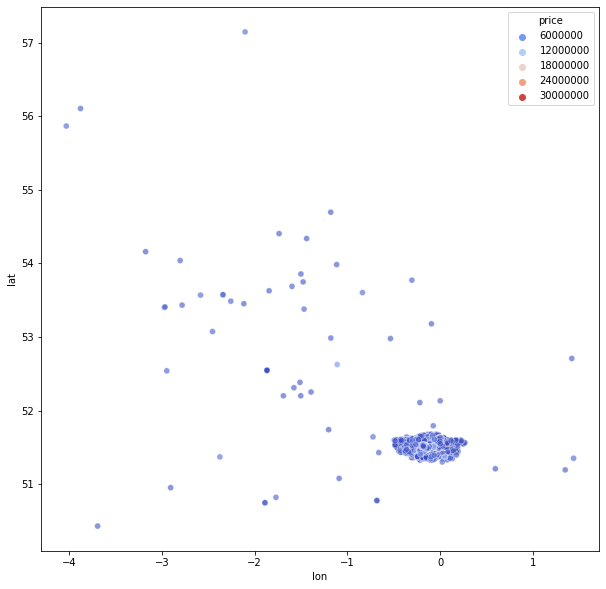

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用房价作为颜色标识
plt.figure(figsize=(10,10))
sns.scatterplot(x='lon', y='lat', hue='price', data=df, palette='coolwarm', alpha=0.6)
plt.show()


In [40]:
import geopandas as gpd

# 加载shp文件
london_boundary = gpd.read_file("D:\\大五上\\casa05GIS\\RStudio-project\\week8-practical\\data\\statistical-gis-boundaries-london\\ESRI\\London_Borough_Excluding_MHW.shp")

# 改变坐标系为WGS 84
london_boundary = london_boundary.to_crs("EPSG:4326")
from shapely.geometry import Point

# 创建几何列
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

# 转换为 GeoDataFrame，设置CRS为WGS 84
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
# 确定每个点是否在伦敦的多边形内
in_london = geo_df['geometry'].apply(lambda x: london_boundary['geometry'].contains(x).any())
# 仅保留在伦敦内的行
df = df[in_london]


In [39]:

df.to_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_accessibility_remove_outliers.csv")



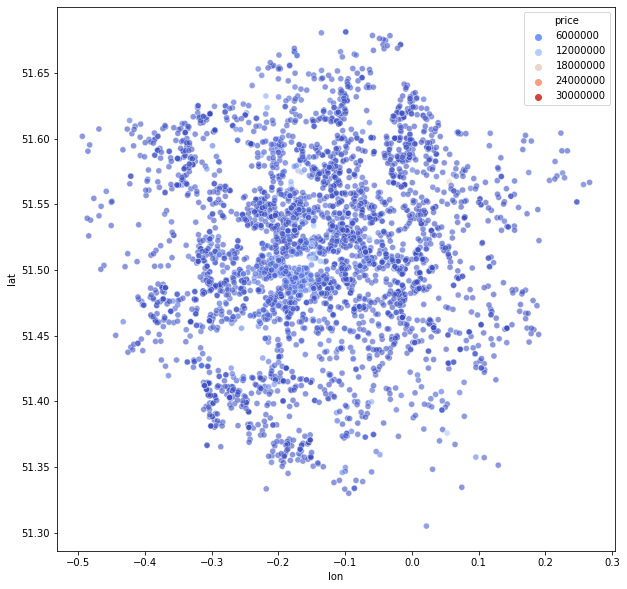

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 使用房价作为颜色标识
plt.figure(figsize=(10,10))
sns.scatterplot(x='lon', y='lat', hue='price', data=df, palette='coolwarm', alpha=0.6)
plt.show()

In [20]:
import geopandas as gpd
from shapely.geometry import Point

# 创建几何列
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)


In [21]:
import folium

# 创建Folium地图
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)  # 伦敦的经纬度

# 将数据添加到地图上
for _, r in geo_df.iterrows():
    folium.CircleMarker(location=[r['lat'], r['lon']], radius=5, color='blue', fill=True).add_to(m)

m.save('map.html')


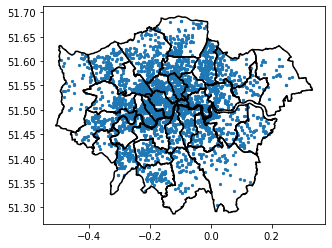

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
london_boundary.boundary.plot(ax=ax, color='black')
geo_df.plot(ax=ax, markersize=5)
plt.show()


In [43]:
import folium
from folium.plugins import HeatMap

# 创建一个地图
m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=10)

# 添加热图
HeatMap(data=df[['lat', 'lon', 'price']].groupby(['lat', 'lon']).mean().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m)

m.save('heatmap.html')


C:\Users\84398\AppData\Local\Temp/ipykernel_31520/2881877220.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(london_boroughs.geometry.centroid.x, london_boroughs.geometry.centroid.y, london_boroughs['Price_per_square_meter']):


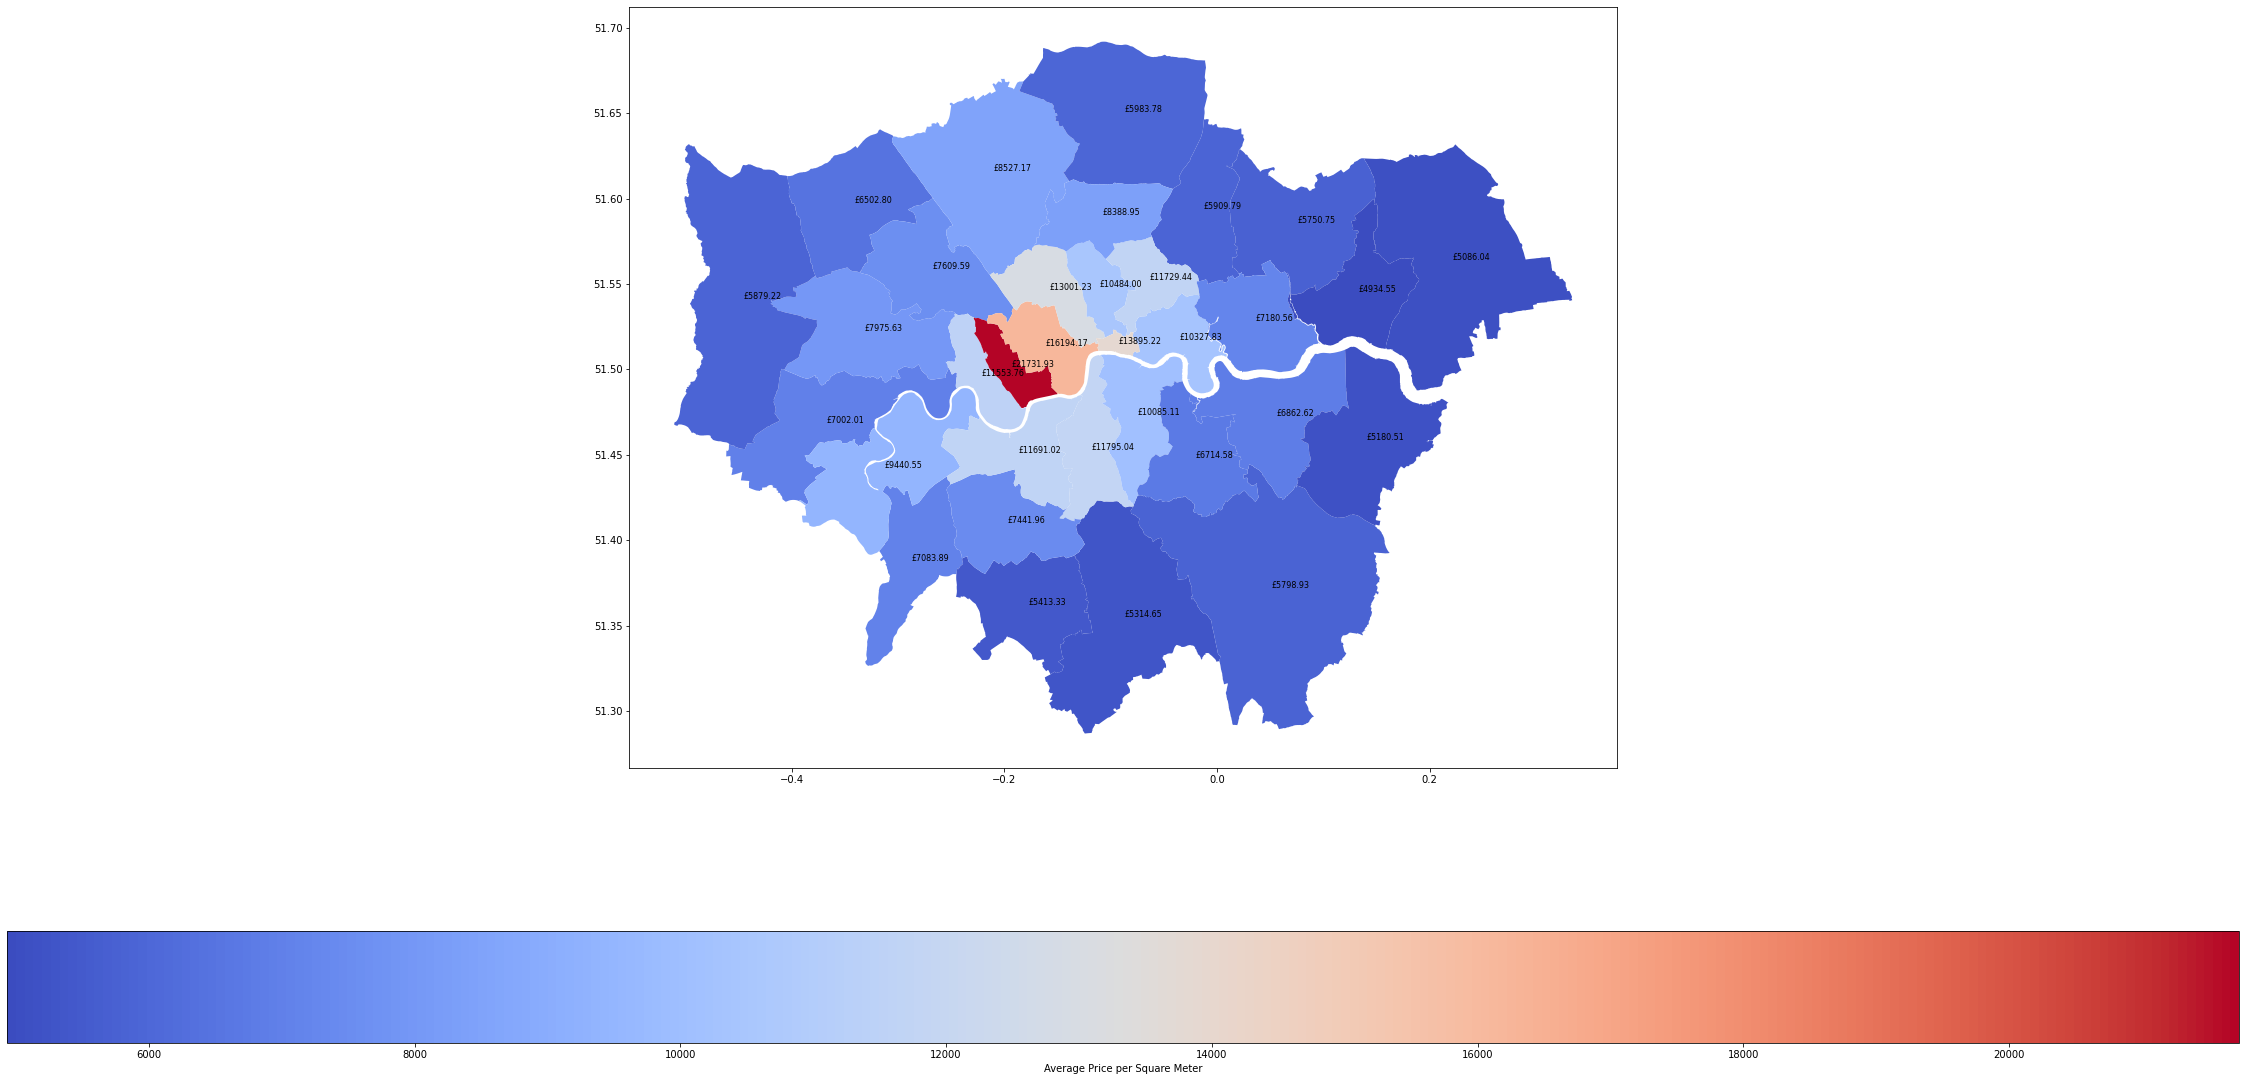

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
df = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_accessibility_remove_outliers.csv")

# 加载shp文件
london_boroughs = gpd.read_file("D:\\大五上\\casa05GIS\\RStudio-project\\week8-practical\\data\\statistical-gis-boundaries-london\\ESRI\\London_Borough_Excluding_MHW.shp")

# 改变坐标系为WGS 84
london_boroughs = london_boroughs.to_crs("EPSG:4326")

# 计算每个区的平均 'Price_per_square_meter'
borough_avg_price = df.groupby('borough')['Price_per_square_meter'].mean()


# 将平均价格数据合并到伦敦区的地理数据上
london_boroughs = london_boroughs.set_index('NAME').join(borough_avg_price)

# 创建 choropleth 地图
fig, ax = plt.subplots(1, 1, figsize=(40,20))
london_boroughs.plot(column='Price_per_square_meter', 
                     ax=ax, 
                     legend=True, 
                     legend_kwds={'label': "Average Price per Square Meter", 'orientation': "horizontal"},
                     cmap='coolwarm')

# 对于每个borough，标注平均房价
for x, y, label in zip(london_boroughs.geometry.centroid.x, london_boroughs.geometry.centroid.y, london_boroughs['Price_per_square_meter']):
    ax.text(x, y, f'£{label:.2f}', fontsize=8)
plt.show()


C:\Users\84398\AppData\Local\Temp/ipykernel_31520/428058171.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(london_boroughs.geometry.centroid.x, london_boroughs.geometry.centroid.y, london_boroughs['Price_per_square_meter']):


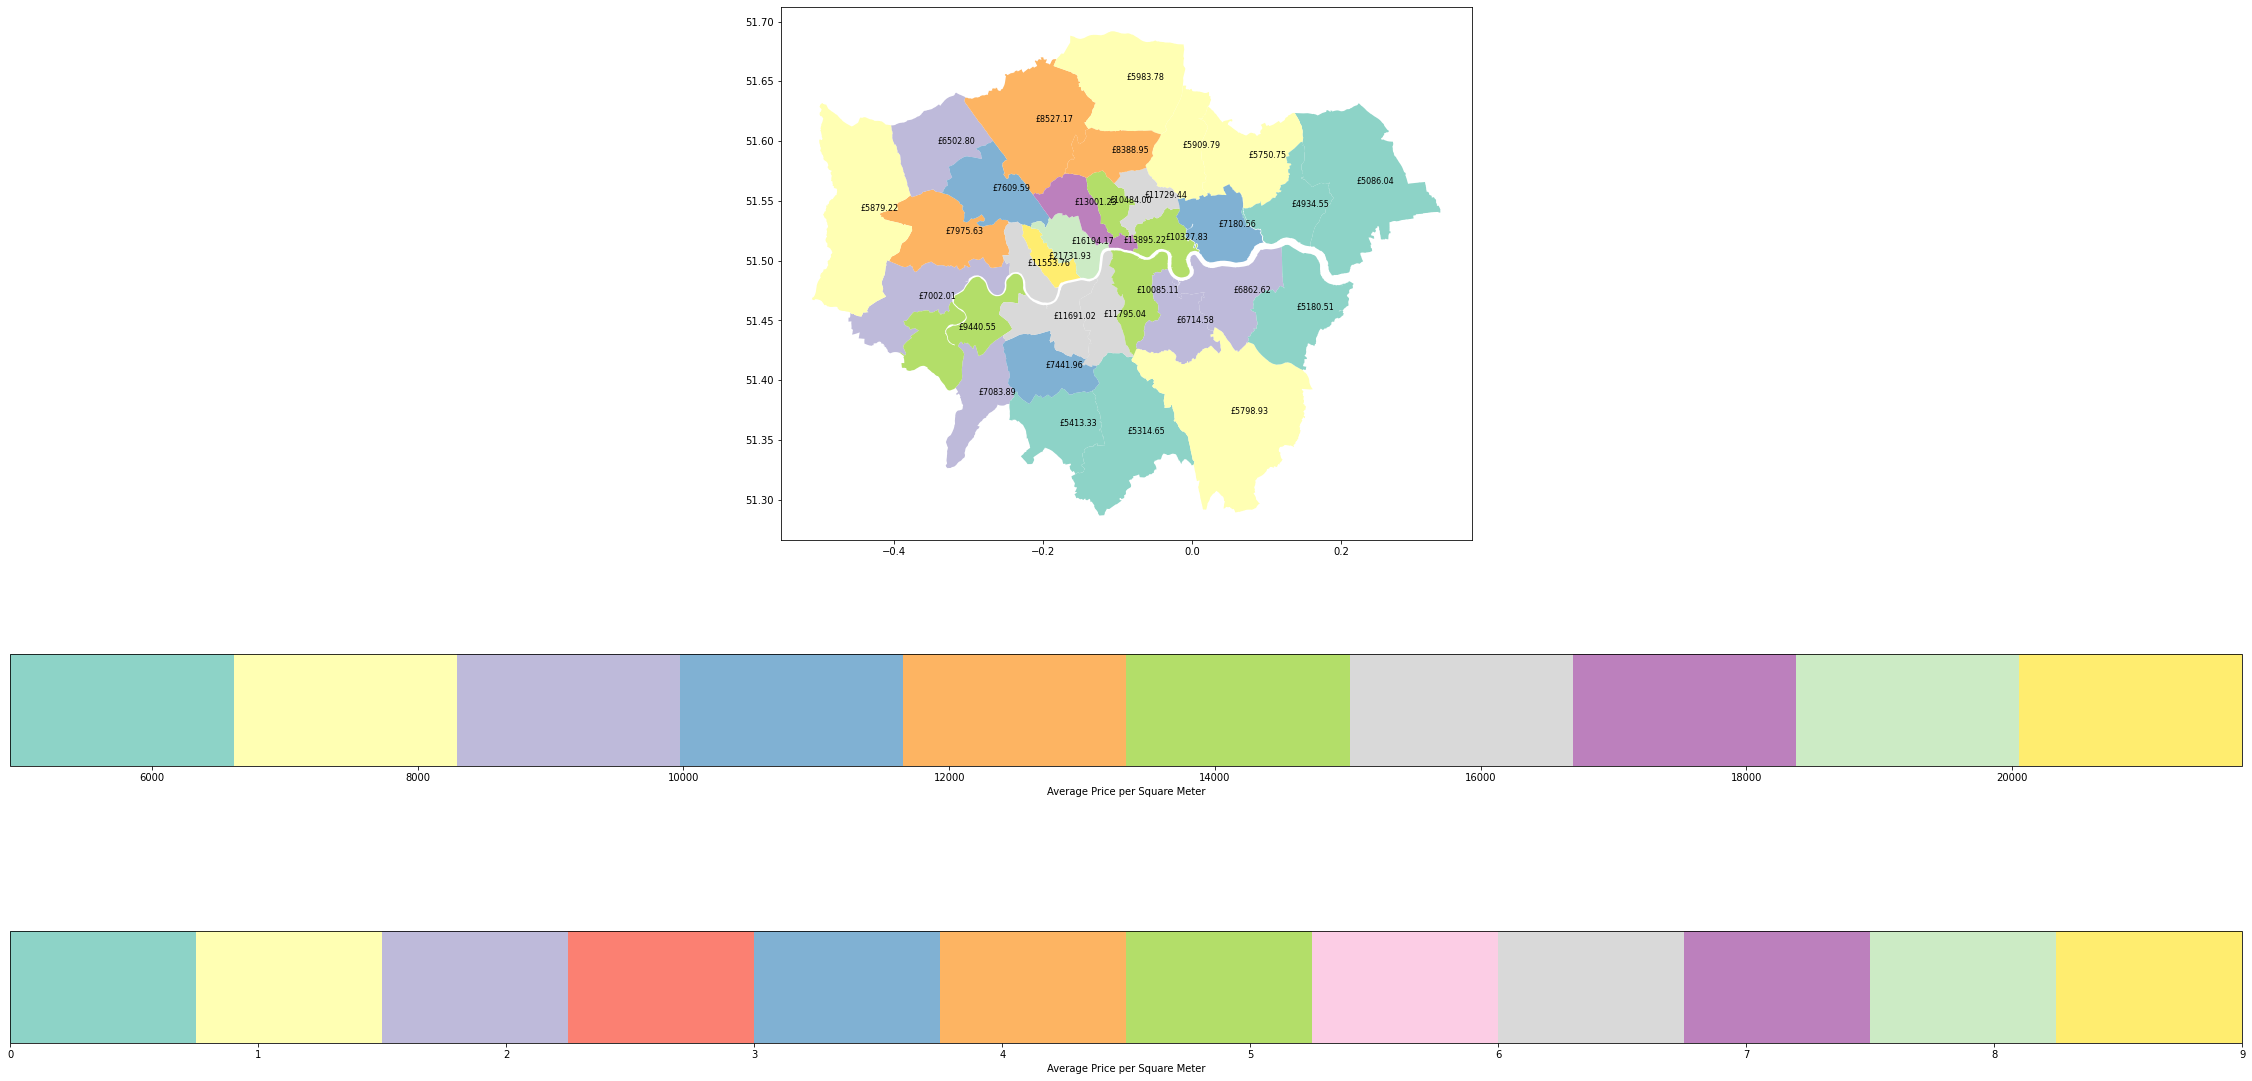

In [64]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import mapclassify

# 获取'Price_per_square_meter'的最大值和最小值
vmin = df['Price_per_square_meter'].min()
vmax = df['Price_per_square_meter'].max()

# 使用FisherJenks算法将数据分割为10个区间
classifier = mapclassify.FisherJenks(london_boroughs['Price_per_square_meter'], k=10)

# 为每个价格区间创建一个新的分类列
london_boroughs['Price_Category'] = london_boroughs[['Price_per_square_meter']].apply(classifier)

# 创建地图
fig, ax = plt.subplots(1, 1, figsize=(40,20))
london_boroughs.plot(column='Price_Category', 
                     ax=ax, 
                     legend=True,
                     cmap='Set3',  # 这是一种称为"Set3"的离散颜色映射
                     legend_kwds={'label': "Average Price per Square Meter", 'orientation': "horizontal"})

norm = plt.Normalize(vmin=london_boroughs['Price_per_square_meter'].min(), vmax=london_boroughs['Price_per_square_meter'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='horizontal', label='Average Price per Square Meter')


# 对于每个borough，标注平均房价
for x, y, label in zip(london_boroughs.geometry.centroid.x, london_boroughs.geometry.centroid.y, london_boroughs['Price_per_square_meter']):
    ax.text(x, y, f'£{label:.2f}', fontsize=8)

plt.show()



In [72]:
# 计算每个区的平均 'Price_per_square_meter' 并按价格进行排序（从高到低）
borough_avg_price = df.groupby('borough')['Price_per_square_meter'].mean().sort_values(ascending=False)

print(borough_avg_price.head(10))



borough
Kensington and Chelsea    21731.933554
Westminster               16194.174479
City of London            13895.222725
Camden                    13001.233558
Lambeth                   11795.043053
Hackney                   11729.436078
Wandsworth                11691.024552
Hammersmith and Fulham    11553.759395
Islington                 10484.000435
Tower Hamlets             10327.825776
Name: Price_per_square_meter, dtype: float64
